https://y-t-g.github.io/tutorials/yolov8n-add-classes/ 사이트를 참고하여 작성하였습니다.

In [1]:
from ultralytics import YOLO
import torch
import copy

# Initialize pretrained model
model = YOLO("yolov8n.pt")

# # Keep a copy of old state dict for sanity check
# old_dict = copy.deepcopy(model.state_dict())

# We should freeze all but the last layer
model.state_dict().keys()

def put_in_eval_mode(trainer, n_layers=22):
  for i, (name, module) in enumerate(trainer.model.named_modules()):
    if name.endswith("bn") and int(name.split('.')[1]) < n_layers:
      module.eval()
      module.track_running_stats = False
      # print(name, " put in eval mode.")

model.add_callback("on_train_epoch_start", put_in_eval_mode)

# Also add it during model setup because of a bug that changes the BN values even before the training starts.
model.add_callback("on_pretrain_routine_start", put_in_eval_mode)

In [2]:
# Train the model. Freeze the first 22 layers [0-21].
results = model.train(data='/content/datasets/yolo_dataset/data.yaml', freeze=22, epochs=30, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.28 🚀 Python-3.10.15 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 15974MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/yolo_dataset/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=22, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

train: Scanning /content/datasets/yolo_dataset/train/labels.cache... 2877 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2877/2877 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.16). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/yolo_dataset/val/labels.cache... 368 images, 0 backgrounds, 0 corrupt: 100%|██████████| 368/368 [00:00<?, ?it/s]


Plotting labels to /ultralytics/runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /ultralytics/runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.06G      1.209      2.191      1.071         28        640: 100%|██████████| 180/180 [00:08<00:00, 20.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 14.05it/s]

                   all        368        433      0.747       0.73      0.776       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30     0.784G      1.217      1.366      1.087         28        640: 100%|██████████| 180/180 [00:08<00:00, 22.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.08it/s]

                   all        368        433      0.804      0.755      0.808      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30     0.784G      1.234       1.11       1.09         41        640: 100%|██████████| 180/180 [00:08<00:00, 21.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.85it/s]


                   all        368        433      0.807      0.776      0.843      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30     0.782G      1.214      1.016      1.089         31        640: 100%|██████████| 180/180 [00:08<00:00, 22.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 14.58it/s]

                   all        368        433      0.854      0.797      0.852      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      0.78G      1.191     0.9673       1.08         29        640: 100%|██████████| 180/180 [00:08<00:00, 21.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.84it/s]

                   all        368        433       0.86      0.807      0.873      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      0.78G      1.179     0.9201      1.082         22        640: 100%|██████████| 180/180 [00:08<00:00, 22.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.57it/s]

                   all        368        433      0.856      0.818      0.868      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      0.78G      1.173     0.9016      1.073         29        640: 100%|██████████| 180/180 [00:08<00:00, 22.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.85it/s]

                   all        368        433      0.867      0.797       0.87      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      0.78G      1.147     0.8724      1.057         33        640: 100%|██████████| 180/180 [00:08<00:00, 22.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.75it/s]

                   all        368        433      0.837      0.827      0.873      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      0.78G      1.157     0.8741      1.066         30        640: 100%|██████████| 180/180 [00:08<00:00, 21.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.91it/s]

                   all        368        433      0.836      0.838      0.876      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      0.78G       1.14     0.8454      1.062         34        640: 100%|██████████| 180/180 [00:08<00:00, 21.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.67it/s]

                   all        368        433      0.856      0.822      0.886      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      0.78G      1.152     0.8332       1.06         38        640: 100%|██████████| 180/180 [00:08<00:00, 22.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.83it/s]

                   all        368        433      0.852      0.813      0.875      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      0.78G      1.135     0.8373      1.055         35        640: 100%|██████████| 180/180 [00:08<00:00, 22.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.93it/s]

                   all        368        433      0.839      0.811      0.871      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      0.78G      1.128     0.8125      1.054         33        640: 100%|██████████| 180/180 [00:08<00:00, 22.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.11it/s]

                   all        368        433       0.85      0.811      0.871      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      0.78G      1.108     0.8151      1.047         31        640: 100%|██████████| 180/180 [00:08<00:00, 22.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.70it/s]

                   all        368        433      0.852      0.814      0.867      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      0.78G      1.113     0.8058      1.047         32        640: 100%|██████████| 180/180 [00:08<00:00, 21.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.16it/s]

                   all        368        433      0.869      0.812      0.879      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      0.78G      1.102     0.7844      1.045         23        640: 100%|██████████| 180/180 [00:08<00:00, 22.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.43it/s]

                   all        368        433      0.878      0.813      0.878      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      0.78G      1.096     0.7852      1.037         29        640: 100%|██████████| 180/180 [00:08<00:00, 21.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 20.54it/s]

                   all        368        433      0.842      0.823      0.874      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      0.78G      1.121     0.7925      1.043         27        640: 100%|██████████| 180/180 [00:08<00:00, 22.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.89it/s]

                   all        368        433      0.859       0.83      0.886      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      0.78G       1.09     0.7835      1.037         40        640: 100%|██████████| 180/180 [00:08<00:00, 22.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 18.96it/s]

                   all        368        433      0.879      0.827      0.886       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      0.78G      1.088     0.7677      1.037         26        640: 100%|██████████| 180/180 [00:08<00:00, 22.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.90it/s]

                   all        368        433      0.827      0.863      0.881      0.618


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.05G      1.019     0.7252      1.023         15        640: 100%|██████████| 180/180 [00:08<00:00, 20.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.24it/s]

                   all        368        433      0.847      0.843      0.879      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30     0.782G      1.012     0.7206      1.019         14        640: 100%|██████████| 180/180 [00:07<00:00, 23.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.36it/s]

                   all        368        433      0.864      0.839      0.882      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30     0.782G      1.005     0.7116      1.017         15        640: 100%|██████████| 180/180 [00:07<00:00, 23.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.81it/s]

                   all        368        433       0.87      0.852      0.899      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      0.78G     0.9967     0.6972      1.016         19        640: 100%|██████████| 180/180 [00:07<00:00, 23.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 16.81it/s]

                   all        368        433      0.821      0.864      0.884      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      0.78G     0.9991     0.6951       1.01         19        640: 100%|██████████| 180/180 [00:07<00:00, 22.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 21.02it/s]

                   all        368        433      0.844      0.861      0.892      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30     0.782G     0.9821     0.6796      1.008         13        640: 100%|██████████| 180/180 [00:07<00:00, 22.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.72it/s]


                   all        368        433      0.845      0.842      0.895      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30     0.782G     0.9858     0.6783       1.01         16        640: 100%|██████████| 180/180 [00:07<00:00, 23.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 20.82it/s]

                   all        368        433      0.875      0.859      0.899      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30     0.782G     0.9754     0.6698      1.001         15        640: 100%|██████████| 180/180 [00:07<00:00, 23.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 17.16it/s]

                   all        368        433       0.87      0.822      0.898      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30     0.782G     0.9754     0.6715      1.008         13        640: 100%|██████████| 180/180 [00:07<00:00, 23.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 15.72it/s]

                   all        368        433      0.858      0.857      0.895      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30     0.784G     0.9772      0.667      1.002         14        640: 100%|██████████| 180/180 [00:07<00:00, 23.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 19.62it/s]

                   all        368        433      0.863      0.857      0.899      0.642



30 epochs completed in 0.077 hours.
Optimizer stripped from /ultralytics/runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from /ultralytics/runs/detect/train3/weights/best.pt, 6.2MB

Validating /ultralytics/runs/detect/train3/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.15 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 4080 SUPER, 15974MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 14.82it/s]


                   all        368        433      0.864      0.857      0.899       0.64
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /ultralytics/runs/detect/train3


In [3]:
new_state_dict = dict()

#  Increment the head number by 1 in the state_dict
for k, v in model.state_dict().items():
  if k.startswith("model.model.22"):
    new_state_dict[k.replace("model.22", "model.23")] = v

# Save the current state_dict. Only layer 23.
torch.save(new_state_dict, "yolov8n_single.pth")

In [4]:
model_2 = YOLO('ultralytics/cfg/models/v8/yolov8n-transfer.yaml', task="detect").load('yolov8n.pt')
state_dict = torch.load("yolov8n_single.pth")

# Load state_dict of the custom trained model head. Layer 23.
model_2.load_state_dict(state_dict, strict=False)

model_2.save("yolov8n_composed.pt")

model_composed = YOLO("yolov8n_composed.pt")

Transferred 355/440 items from pretrained weights



image 1/1 /content/datasets/test5.jpg: 448x640 14 0s, 12 80s, 87.0ms
Speed: 1.3ms preprocess, 87.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


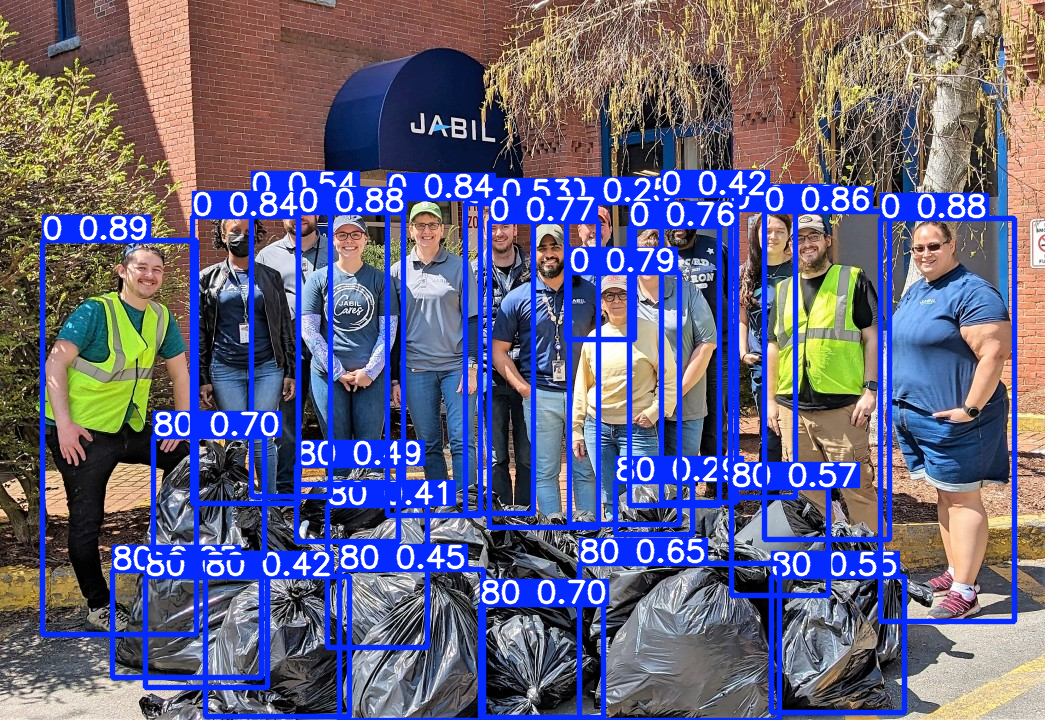

In [5]:
results = model_composed.predict(
    source="/content/datasets/test5.jpg", # source image from https://clintongreenway.org/
    classes=[0, 80],
    conf=0.25,
    save=False,
    
    # show=True,
    show_labels=True,
    show_boxes=True,
    show_conf=True,
    line_width=2,
)

results[0].show()